# Plot model vs STA RF estimates

## Setup

In [1]:
run -im djd.main -- --dbname=dj_lisa --user=write

Connecting write@huxley.neuro.bzm:3306
Connected to database 'dj_lisa' as 'write@10.153.173.165'


In [14]:
import matplotlib.pyplot as plt

from djd.plot import cm2inch, adjust_spines
from djd.hmov_unit import get_STA
from djd.glms import plot_model, plot_rf, get_best_model

In [3]:
%load_ext autoreload
%autoreload 2

In [6]:
## Update plot parameters
# Option 1: Update general pars from modified matplotlibrc file
# plt.rcParams.update(mpl.rc_params_from_file('../../matplotlibrc', fail_on_error=False, use_default_template=True))

# Option 2: Dynamically update general pars (use if not updating from modified matplotlibrc)
plt.rcParams.update({
    'figure.dpi': 150,
    'figure.max_open_warning': 0, 
    'axes.linewidth': 0.5,
    'xtick.major.width': 0.5,
    'ytick.major.width': 0.5,
    'axes.labelsize': 'medium',
    'font.sans-serif': ['Arial'],
    'pdf.fonttype': 42, # make text editable (otherwise saved as non-text path/shape)
    'ps.fonttype': 42, # make text editable (otherwise saved as non-text path/shape)
    })


# Dynamically update plot-specific pars
plt.rcParams.update({
    'figure.dpi': 150,
    'figure.max_open_warning': 0,
    'font.size': 8,
    'axes.labelsize': 7.0,
    'axes.titlesize': 8,
    'legend.fontsize': 7,
    'xtick.labelsize': 7,
    'ytick.labelsize': 7,    
    })

In [7]:
# Make figure directory unless it already exists
fig_dir = os.path.join(os.getcwd(), 'figs')  # os.path.dirname(__file__) would give DJD path
if not os.path.exists(fig_dir):
    print(f"Making figure save directory:/n{fig_dir}")
    os.makedirs(fig_dir)

## Specify movie and sparse noise model keys
Unit keys chosen based on previous exploration of paired hmov vs spnoise models and STAs in ../fig_hmov_vs_spnoise_models/explore_hmov_vs_spnoise_models.ipynb

If you want a specific model parameter set, just uncomment the 'spl_paramset' part of the key.
Alternatively, spcifying only MSU and then pickick the best model for these units will be more stable if we deprecate this model paramset.

In [8]:
# Specify keys
hmov_key = {'m': 'Ntsr1Cre_2019_0008', 's': 6, 'e': 6, 'u': 40}#, 'spl_paramset': 748}
spnoise_key = {'m': 'Ntsr1Cre_2019_0008', 's': 6, 'e': 3, 'u': 40}#, 'spl_paramset': 4}

# Pick best model for each stimulus (restricted to stimulus-only configurations)
hmov_key = get_best_model(hmov_key, crit='spl_r_test', 
                          opto_config='False', run_config='False', eye_config='False', pshf_config='False',
                          key_only=True, format='dict')
print(f"hmov_key: {hmov_key}")

spnoise_key = get_best_model(spnoise_key, crit='spl_r_test', 
                          opto_config='False', run_config='False', eye_config='False', pshf_config='False',
                          key_only=True, format='dict')
print(f"spnoise_key: {spnoise_key}")

hmov_key: {'m': 'Ntsr1Cre_2019_0008', 's': 6, 'e': 6, 'u': 40, 'spl_paramset': 748}
spnoise_key: {'m': 'Ntsr1Cre_2019_0008', 's': 6, 'e': 3, 'u': 40, 'spl_paramset': 4}


## Plot models

### Plot full models

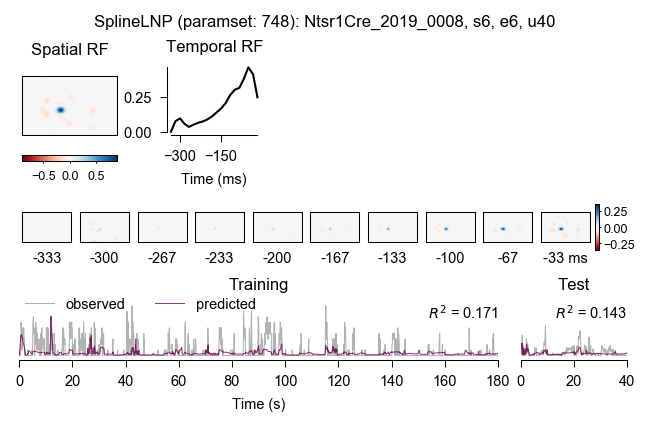

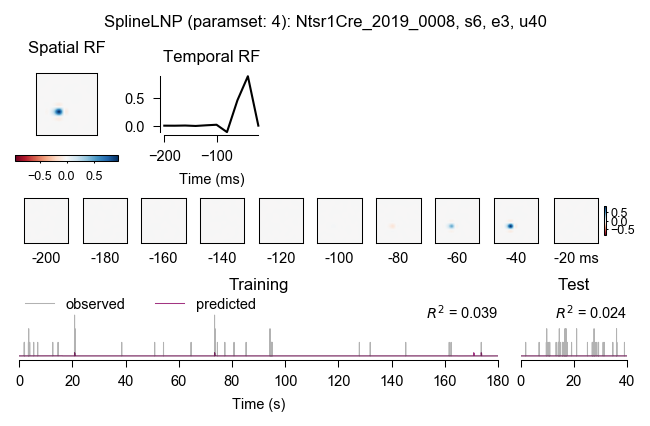

In [9]:
fig_hm, ax = plot_model(hmov_key, title=True)
fig_sn, ax = plot_model(spnoise_key, title=True)

fig_hm.savefig('./figs/hmov_model.pdf')
fig_sn.savefig('./figs/spnoise_model.pdf')

### Plot model RFs only
TODO: put this function code into DJD and integrate into plot_rf_filters()

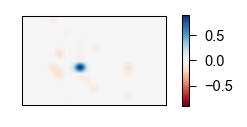

In [10]:
fig, ax = plt.subplots(figsize=cm2inch((3.90, 2.34)), constrained_layout=True)
plot_rf(hmov_key, show_ax=True, show_ticks=False, ax=ax)

fig.savefig('./figs/hmov_model_sRF.pdf')

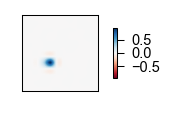

In [11]:
fig, ax = plt.subplots(figsize=cm2inch((2.71, 1.62)), constrained_layout=True)
plot_rf(spnoise_key, show_ax=True, show_ticks=False, ax=ax)

fig.savefig('./figs/spnoise_model_sRF.pdf')

## Plot Hmov STA

### Plot movie stimulus-corrected STA

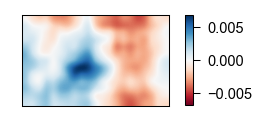

In [12]:
fig, ax = plt.subplots(figsize=cm2inch((4.23, 2.54)), constrained_layout=True)

(HmovUnit() & hmov_key).plot_STA(stim_corrected=True, smooth='spline16', plot_center=False, title=False, show_ax=True, show_ticks=False, ax=ax)

fig.savefig('./figs/hmov_STA_corrected.pdf')

### Plot movie simple STA

Stimulus.HmovScenes.export_scene_seq(): hmov03_randseq01_13x21_yflip.npy already exists. Loading file from: /Volumes/mudata/exxpResources/hollymov/hmov_03/dataloader  ...


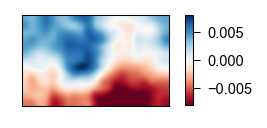

In [13]:
fig, ax = plt.subplots(figsize=cm2inch((4.23, 2.54)), constrained_layout=True)

(HmovUnit() & hmov_key).plot_STA(stim_corrected=False, norm=True, mean_subtract=True, smooth='spline16', 
                                 plot_center=False, title=False, show_ax=True, show_ticks=False, ax=ax)

fig.savefig('./figs/hmov_STA_simple.pdf')

## Plot movie stimulus mean per pixel

Stimulus.HmovScenes.export_scene_seq(): hmov03_randseq01_13x21_yflip.npy already exists. Loading file from: /Volumes/mudata/exxpResources/hollymov/hmov_03/dataloader  ...


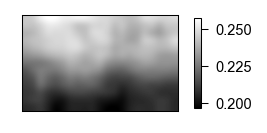

In [80]:
# Get stimulus average from get_STA
_, stim = get_STA(hmov_key, stim_scaling=0.0495, norm=False, return_stim_mean=True)

# Plot
fig, ax = plt.subplots(figsize=cm2inch((4.23, 2.54)), constrained_layout=True)
im = ax.imshow(stim, cmap='gray', interpolation='spline16', origin='lower')  # vmin=-STA_max, vmax=STA_max,

ax.set_xticks([])
ax.set_yticks([])

cbar = fig.colorbar(im, ax=ax, shrink=0.6)

fig.savefig('./figs/hmov_stim_mean.pdf')

## Plot sparse noise RF
Using the Tuning() method get_rf(), which plots ON-, OFF-, MIX- and overlay-RFs for the sparse noise stimulus.
Since we are only interested in the MIX-RF, we create an extra dummy figure for the unused axes, modulating and saving only the MIX-RF axis.

/Users/ybauer/code/djd/djd/tuning.py:645: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  plt.subplots_adjust(hspace=0.5)


Text(0.5, 1.0, '')

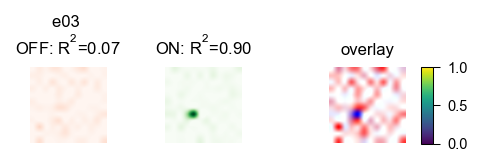

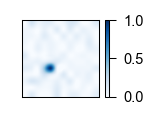

In [22]:
# Create figures
fig_dummy, axs_dummy = plt.subplots(nrows=1, ncols=3, figsize=cm2inch((8, 2.54)), constrained_layout=True)  # dummy fig
fig, ax = plt.subplots(figsize=cm2inch((2.85, 1.71)), constrained_layout=True)

# Use Tuning().plot_rf()
(Tuning() & spnoise_key & {'tun_model': 'ellipse', 'st8_type': 'none'}  # need to specify tuning model and state type
        ).plot_rf(axs=[axs_dummy[0], axs_dummy[1], ax, axs_dummy[2]], 
                  ticks=None, cmaps=['Reds', 'Greens','Blues'], interp='spline16', rgb_overlay=True,
                  start_cm={'r':255, 'g':255, 'b':255},  
                  stop_off_cm={'r':255, 'g':0, 'b':0},
                  stop_on_cm={'r':0, 'g':0, 'b':255},
                  ellipse_col='k', ellipse_alpha=0)

# Plot colorbar
im = ax.get_images()[0]
cbar = fig.colorbar(im, ax=ax)#, shrink=0.6)# fraction=0.046, pad=0.04)#, location='bottom', aspect=10, pad=0.0)
# Colorbar for overlay picture
im = axs_dummy[2].get_images()[0]  
cbar = fig_dummy.colorbar(im, ax=axs_dummy[2])


# Add spines
for loc, spine in ax.spines.items(): spine.set_visible(True)
    
# Remove title
ax.set_title('')

fig.savefig('./figs/spnoise_sta_rf.pdf')

## Plot sparse noise StimTA
Just for illustration

/Users/ybauer/code/djd/djd/unit.py:1752: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()


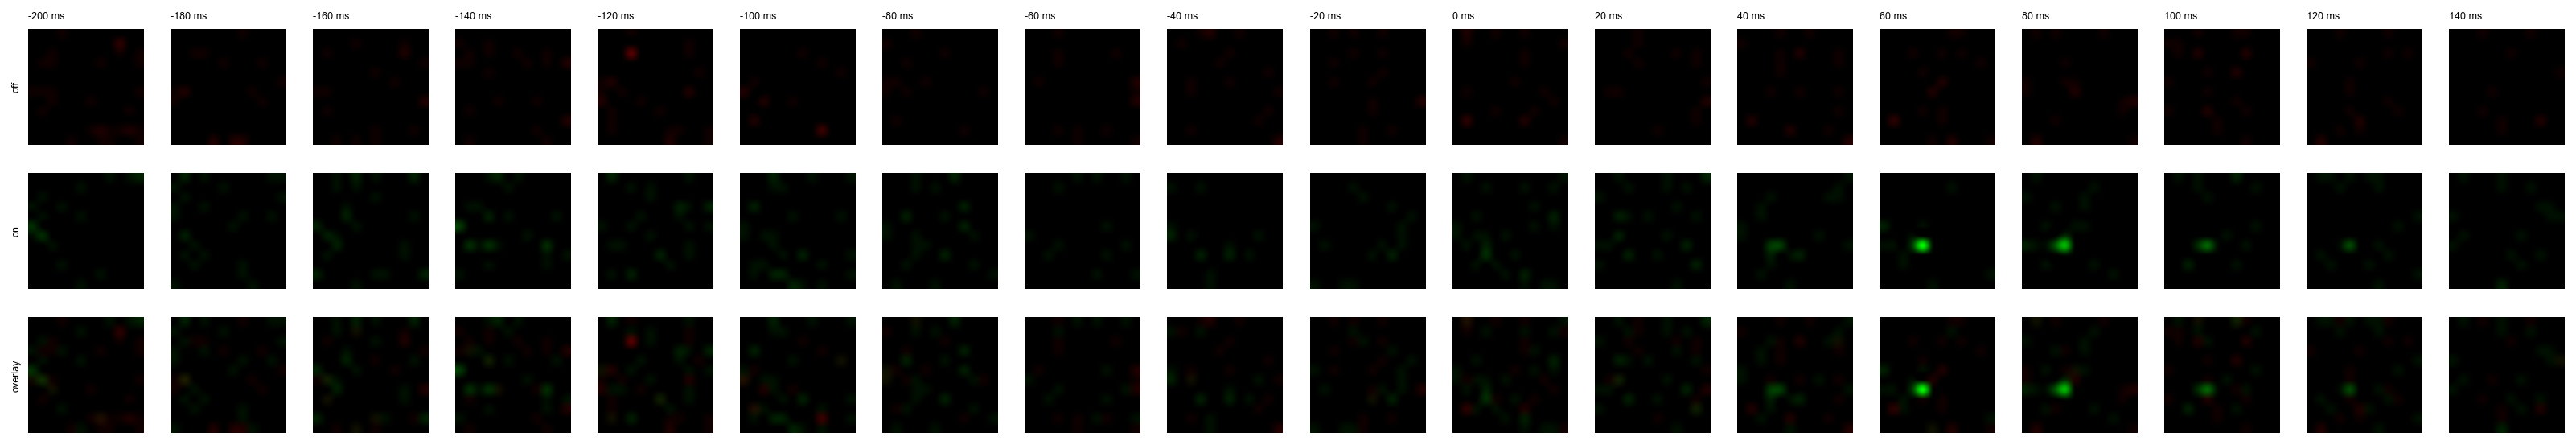

In [17]:
(Unit.Spikes() & spnoise_key).sta(tstart=-0.2, tstop=0.15, tres=0.02, precision=3, ticks=None,
                          direction='stimta', ticklabelsize=6, titlesize=6, ylabelsize=6);